#5.텍스트 데이터 분석

## 5.1 텍스트 전처리

### 5.1.1 토큰화 (Tokenization)
주어진 코퍼스 내에서 분석 대상이 되는 유의한 단위인 토큰으로 나누는 작업 <br>
아래 예시에서 토큰은 단어
<br>

ex)
I like apple <br>
-> token: I, like, apple

<br>

주의사항: 단순히 특수문자 등을 제외하고 공백 기준으로 잘라내는 작업이라고는 할 수 없음 <br>
> ex) 
- 36.5, Ph.D, AT&T <br>
- 줄임말
- 야민정음
- 기타



### 5.1.2 정제 (Cleaning)
가지고 있는 단어 집합에서 불필요한 데이터를 제거하는 것 <br>
토큰화 작업 전후로 적용 <br>

> example
- 등장 빈도가 적은 단어
- 길이가 짧은 단어

### 5.1.3 정규화 (Normalization)
표현방법이 다른 단어를 하나의 단어로 통합

> example
- 대소문자 (covid == COVID)
- 동의어 (covid == 코로나)

#### 표제어 추출 (Lemmatization)
단어의 어근을 찾아 추출

> example
- am, are, is -> be
- apples -> apple


### 5.1.4 불용어 (Stopword)

가지고 있는 데이터 중 불필요한 토큰을 제거하는 작업 <br>
자주 등장하지만 분석에 큰 도움이 되지 않는 단어를 의미 <br>

> example <br>
- and, am, I, about 

<br>

```python
# 영문 불용어
from nltk.corpus import stopwords

stop_words_list = stopwords.words('english')
[word for word in word_tokens if word not in stop_words]

# 한국어 불용어
# https://www.ranks.nl/stopwords/korean
```

## 5.2 텍스트 데이터 분석

### 5.2.1 WordCloud
데이터의 태그들을 분석하여 중요도나 인기도 등을 고려하여 시각적으로 표시하는 것 <br>
주로 단어의 빈도를 이용하며, 중요도에 따라 글자의 색상이나 굵기 등 형태를 변화시킬 수 있음
<br>

```python
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```
<br>

아래의 방법을 통해 특정 이미지 모양으로 시각화 가능
```python
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

mask = Image.new('RGBA', (2048, 2048), (255, 255, 255))
image = Image.open('./data/heart.png').convert('RGBA')
x, y = image.size
mask.paste(image, (0, 0, x, y), image)
mask = np.array(mask)

counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism',
    mask=mask,
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')
```

In [1]:
!pip install wordcloud

In [2]:
!pip install kiwipiepy

  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.14.0-py3-none-any.whl size=30560039 sha256=799c1db7bdf3b2444cc677192871bdfbc4edb3e0da8cee0b8fb04d85abea4809
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\cd\10\8e\2d32ad6e25239a4edf2b1d862924c86e646eb3b0f677297320
Successfully built kiwipiepy-model


In [2]:
import pandas as pd
import numpy as np
import re
import itertools
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from kiwipiepy import Kiwi

In [2]:
only_comments = pd.read_csv(r'C:\Users\user\Documents\github\2022_08_06_big_data\bigdata2\data\youtube\comments.csv')
video_info = pd.read_csv(r'C:\Users\user\Documents\github\2022_08_06_big_data\bigdata2\data\youtube\video_info.csv')

In [3]:
comments = video_info.merge(only_comments, on='video_id')

In [4]:
soojung = comments.query('video_id == "JPaubSOSxeM"')

In [5]:
soojung
soojung.comments = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎ ㅏ-ㅣ\.!^]', '',x))

C:\Users\user\AppData\Local\Temp\ipykernel_10788\3090016738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung.comments = soojung.comments.apply(lambda x: re.sub('[ㄱ-ㅎ ㅏ-ㅣ\.!^]', '',x))


In [6]:
soojung

,video_id,title,comments
0,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와숨막힌다
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가세뇌당함
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아존나웃기닼
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아남자믿지말고외박하지마라
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건사랑이아니다애비를죽여라,"
...,...,...,...
3848,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,오우
3849,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,1등
3850,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,와
3851,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,재밌네요


In [10]:
kiwi = Kiwi()
test_sentence = kiwi.analyze('여자들아 남자 믿지 말고 외박하지마라.')

In [11]:
[token.form for token in test_sentence[0][0] if re.match('N', token.tag)]

['여자', '남자', '외박']

In [25]:
def extract_noun_from_kiwi_analyzed(comment):
    temp_sentence = kiwi.analyze(comment)
    noun_list = [token.form for token in temp_sentence[0][0] if re.match('N', token.tag)]
    return noun_list

In [26]:
soojung['noun_comment'] = soojung.comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))

C:\Users\user\AppData\Local\Temp\ipykernel_10788\1711076811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['noun_comment'] = soojung.comments.apply(lambda x: extract_noun_from_kiwi_analyzed(x))


In [27]:
from collections import Counter

In [149]:
soojung.noun_comment.values

array([list(['숨']), list(['아빠', '세뇌']), list(['아존나웃기닼']), ..., list([]),
       list([]), list([])], dtype=object)

In [28]:
soojung.noun_comment.values

array([list(['숨']), list(['아빠', '세뇌']), list(['아존나웃기닼']), ..., list([]),
       list([]), list([])], dtype=object)

In [29]:
total_words = []
for words in soojung.noun_comment.values:
    total_words.append(words)

In [30]:
total_words =list(itertools.chain(*soojung.noun_comment.values))

In [150]:
word_count = Counter(total_words)
word_count

Counter({'딸': 151,
         '아빠': 181,
         '세뇌': 2,
         '아존나웃기닼': 1,
         '여자': 24,
         '남자': 36,
         '외박': 35,
         '이거': 54,
         '사랑': 13,
         '애비': 3,
         '아영': 55,
         '여기': 23,
         '아버지': 78,
         '이번': 81,
         '레전드': 41,
         '좀비': 2,
         '소리': 15,
         '수정': 98,
         '대역': 3,
         '원내': 1,
         '이야기': 8,
         '대기업': 1,
         '딸아이': 5,
         '캐나다': 2,
         '의심': 14,
         '엄마': 60,
         '마누라': 4,
         '장모': 1,
         '장인': 1,
         '구라': 13,
         '상기': 1,
         '관광': 6,
         '진전': 1,
         '결국': 7,
         '확인': 5,
         '사위': 1,
         '사이': 8,
         '손주': 2,
         '지금': 12,
         '사실': 2,
         '타임': 1,
         '할아버지': 3,
         '장려': 1,
         '아버님': 54,
         '스물': 11,
         '아홉': 12,
         '대본': 27,
         '어디': 29,
         '야채': 58,
         '누나': 9,
         '뷰티': 3,
         '인사이드': 3,
         '아죈장': 1,
    

In [36]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(word_count)

(-0.5, 399.5, 199.5, -0.5)

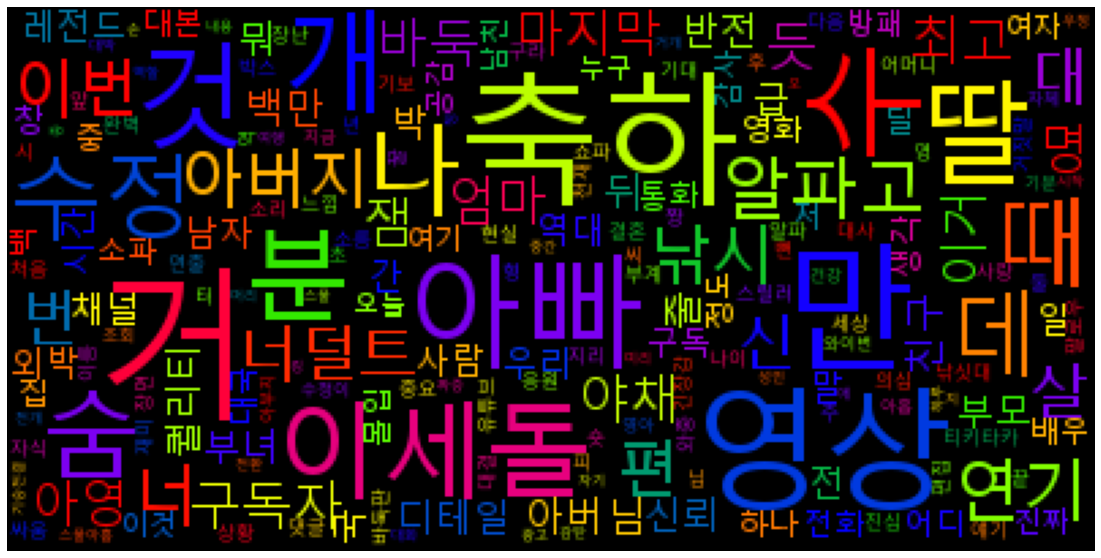

In [37]:
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [45]:
word_count.most_common(20)

[('거', 355),
 ('축하', 258),
 ('만', 235),
 ('영상', 229),
 ('수', 202),
 ('아빠', 181),
 ('것', 153),
 ('딸', 151),
 ('개', 147),
 ('이세돌', 136),
 ('분', 130),
 ('숨', 116),
 ('나', 113),
 ('때', 107),
 ('데', 99),
 ('수정', 98),
 ('알파고', 95),
 ('연기', 92),
 ('너', 85),
 ('이번', 81)]

In [39]:
soojung.noun_comment

0                [숨]
1           [아빠, 세뇌]
2           [아존나웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849             [등]
3850              []
3851              []
3852              []
Name: noun_comment, Length: 3853, dtype: object

In [44]:
soojung.loc[(soojung.comments.str.find('수정') != -1)]

,video_id,title,comments,noun_comment
10,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정대역대박,"[수정, 대역, 박]"
46,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정씨대역너무웃겨요,"[수정, 씨, 대역]"
53,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,이름도수정이네야,"[이름, 수정]"
57,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,가짜수정이매력오뭐드셨어이부뷴,[가짜수정이매력오뭐드셨어이부뷴]
61,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,구우정현수정쌉캐리네,[구우정현수정쌉캐리네]
...,...,...,...,...
3631,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정이랑,[수정]
3644,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,100만미리축하드립니다\n바둑의수싸움부녀지간의수싸움\n해산물수정이,"[만, 미리, 축하, 바둑, 싸움, 부녀, 간, 싸움, 해산물, 수정]"
3682,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,수정이극딜개웃기네,"[수정이, 극, 딜, 개]"
3687,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,가상의수정이,"[가상, 수정]"


In [47]:
total_words

['숨',
 '아빠',
 '세뇌',
 '아존나웃기닼',
 '여자',
 '남자',
 '외박',
 '이거',
 '사랑',
 '애비',
 '아영',
 '님',
 '여기',
 '년',
 '아버지',
 '이번',
 '편',
 '레전드',
 '좀비',
 '소리',
 '수정',
 '대역',
 '박',
 '원내',
 '이야기',
 '대기업',
 '딸아이',
 '살',
 '캐나다',
 '아빠',
 '의심',
 '나',
 '지',
 '엄마',
 '나',
 '뭐',
 '나',
 '나',
 '마누라',
 '나',
 '장모',
 '장인',
 '구라',
 '일',
 '상기',
 '딸',
 '캐나다',
 '관광',
 '일',
 '진전',
 '결국',
 '유',
 '투',
 '브',
 '놈',
 '확인',
 '여기',
 '마누라',
 '딸',
 '놈',
 '사위',
 '사이',
 '손주',
 '지금',
 '살',
 '사실',
 '유',
 '투',
 '브',
 '타임',
 '저',
 '결국',
 '유',
 '투',
 '브',
 '할아버지',
 '외박',
 '장려',
 '아버님',
 '스물',
 '아홉',
 '애비',
 '선',
 '대본',
 '어디',
 '것',
 '야채',
 '누나',
 '뷰티',
 '인사이드',
 '거',
 '아죈장',
 '번',
 '거',
 '딸',
 '눈물',
 '돈',
 '나이',
 '세상',
 '아빠',
 '평생',
 '양육',
 '거',
 '남자',
 '여행',
 '시집',
 '신데렐라',
 '놀이',
 '때',
 '먹',
 '버',
 '아빠',
 '남친',
 '존나웃기넼',
 '호흡',
 '아내',
 '짓',
 '딸래미',
 '남친',
 '펜션',
 '여행',
 '외박',
 '말',
 '이번',
 '스릴러',
 '숨',
 '본인',
 '아빠',
 '자연',
 '사람',
 '번',
 '사람',
 '아버지',
 '세뇌',
 '아귀',
 '연기',
 '거',
 '울',
 '나라',
 '여자',
 '평균',
 '외모',
 '고봉',
 '중간',
 '몰입',
 '급발진

In [50]:
ddal_list = [word for word in total_words if word =="딸"]
word_more_than_2_character = [word for word in total_words if len(word)>=2]
total_words = ddal_list + word_more_than_2_character
word_count = Counter(total_words)

In [51]:
word_count.most_common(10)

[('축하', 258),
 ('영상', 229),
 ('아빠', 181),
 ('딸', 151),
 ('이세돌', 136),
 ('수정', 98),
 ('알파고', 95),
 ('연기', 92),
 ('이번', 81),
 ('아버지', 78)]

In [60]:
mask = Image.new('RGBA', (2048, 2048), (255, 255, 255))
image = Image.open('.C:\Users\user\Documents\github\2022_08_06_big_data\bigdata2\data\image\heart.png').convert('RGBA')
x, y = image.size
mask.paste(image, (0, 0, x, y), image)
mask = np.array(mask)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 3-4: truncated \UXXXXXXXX escape (2552935205.py, line 2)

In [54]:
kiwi.add_user_word('아이오아이', 'NNG', 10)

True

In [55]:
kiwi.analyze('아이오아이')

[([Token(form='아이오아이', tag='NNG', start=0, len=5)], -2.2680587768554688)]

In [56]:
word_count.most_common(20)

[('축하', 258),
 ('영상', 229),
 ('아빠', 181),
 ('딸', 151),
 ('이세돌', 136),
 ('수정', 98),
 ('알파고', 95),
 ('연기', 92),
 ('이번', 81),
 ('아버지', 78),
 ('낚시', 76),
 ('너덜트', 75),
 ('구독자', 69),
 ('최고', 63),
 ('엄마', 60),
 ('야채', 58),
 ('바둑', 58),
 ('마지막', 57),
 ('아영', 55),
 ('이거', 54)]

In [57]:
word_cloud = WordCloud(
    font_path='malgun',
    background_color='black',
    max_font_size=60,
    colormap='prism'
).generate_from_frequencies(word_count)

(-0.5, 399.5, 199.5, -0.5)

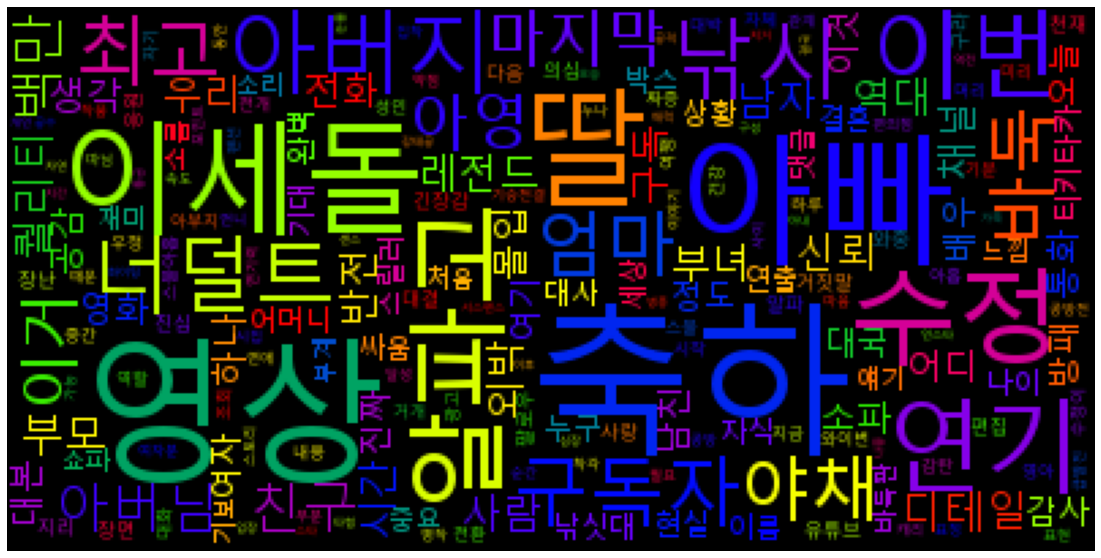

In [58]:
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud)
plt.axis('off')

In [59]:
word_count.most_common(20)

[('축하', 258),
 ('영상', 229),
 ('아빠', 181),
 ('딸', 151),
 ('이세돌', 136),
 ('수정', 98),
 ('알파고', 95),
 ('연기', 92),
 ('이번', 81),
 ('아버지', 78),
 ('낚시', 76),
 ('너덜트', 75),
 ('구독자', 69),
 ('최고', 63),
 ('엄마', 60),
 ('야채', 58),
 ('바둑', 58),
 ('마지막', 57),
 ('아영', 55),
 ('이거', 54)]

In [66]:
word_count

Counter({'딸': 151,
         '아빠': 181,
         '세뇌': 2,
         '아존나웃기닼': 1,
         '여자': 24,
         '남자': 36,
         '외박': 35,
         '이거': 54,
         '사랑': 13,
         '애비': 3,
         '아영': 55,
         '여기': 23,
         '아버지': 78,
         '이번': 81,
         '레전드': 41,
         '좀비': 2,
         '소리': 15,
         '수정': 98,
         '대역': 3,
         '원내': 1,
         '이야기': 8,
         '대기업': 1,
         '딸아이': 5,
         '캐나다': 2,
         '의심': 14,
         '엄마': 60,
         '마누라': 4,
         '장모': 1,
         '장인': 1,
         '구라': 13,
         '상기': 1,
         '관광': 6,
         '진전': 1,
         '결국': 7,
         '확인': 5,
         '사위': 1,
         '사이': 8,
         '손주': 2,
         '지금': 12,
         '사실': 2,
         '타임': 1,
         '할아버지': 3,
         '장려': 1,
         '아버님': 54,
         '스물': 11,
         '아홉': 12,
         '대본': 27,
         '어디': 29,
         '야채': 58,
         '누나': 9,
         '뷰티': 3,
         '인사이드': 3,
         '아죈장': 1,
    

### 5.2.2 TF-IDF
TF-IDF는 단어 빈도와 역 문서 빈도를 사용하여 문서 단어 행렬(DTM) 내의 각 단어 

#### 문서 단어 행렬 (Document-Term Matrix, DTM)
다수의 문서에 등장하는 각 단어들의 빈도를 행렬로 표현한 것

문서1: I like apple and also like samsung<br>
문서2: I like apple watch <br>
문서3: I do like samsumg smart phone <br>
문서4: I hate phone <br>
<br>

|문서|I|like|do|hate|apple|watch|samsung|smart|phone|and|also
|-|-|-|-|-|-|-|-|-|-|-|-|
|문서1|1|2|0|0|1|0|0|0|0|1|1|
|문서2|1|1|0|0|1|1|0|0|0|0|0|
|문서3|1|1|1|0|0|0|1|1|1|0|0|
|문서4|1|0|0|1|0|0|0|0|1|0|0|

<br>

위의 방법으로 행렬 구성 시, 단어가 column이 되는데, 등장하는 단어가 많을수록, 대부분의 벡터가 0을 가지게 됨 <br>

이를 **희소 벡터, 행렬**이라 부름 <br>

이는 많은 저장 공간과 높은 계산 비용을 필요로 하기에, 전처리를 통하여 크기를 줄이는 작업이 중요 <br>


#### Term Fequency (TF)
tf(d, t): 특정 문서 d에서 단어 t의 등장 횟수 <br>
<br>

> ex)
tf(1, 'like') = 2

```python
def term_frequency(term, document):
  return document.count(term)
```

```python
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf = []

for i in range(len(documents)):
  tf.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf[-1].append(term_frequency(term, document))

tf = pd.DataFrame(tf, columns=vocab)
```

#### IDF
df(d, t) = $log(\frac{n}{1+df(t)})$: 특정 단어 t가 등장한 문서의 수 <br>
<br>

> ex) idf

```python
def inverse_document_frequency(term, documents):
  N = len(documents)
  document_frequency = 0

  for document in documents:
    if term in document.split():
      document_frequency += 1
  
  return np.log(N/(document_frequency+1))
```

```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
idf = []

result = []
for i in range(len(vocab)):
    term = vocab[i]
    result.append(inverse_document_frequency(term, documents))

idf = pd.DataFrame(result, index=vocab, columns=["IDF"])
```

df(t) = n일때만 df(d, t)의 값이 음수이다.

In [110]:
import pandas as pd


In [111]:
import itertools
import pandas as pd

documents = ['I like apple and also like samsung', 'I like apple watch', ' I do like samsung smart phone', 'I hate phone']
word_list = [document.split() for document in documents]
words = list(itertools.chain(*word_list))
words = np.unique(words)

In [112]:
def term_freqeuncy(term, document):
    return document.count(term)

In [113]:
def inverse_document_frequency(term, document):
    N = len(documents)
    document_frequency = 0

    for document in documents:
        if term in document.split():
            document_frequency += 1

    return np.log(N/(document_frequency+1))

In [114]:
idf_list = []
for term in words:
    idf_list.append(inverse_document_frequency(term, documents))
idf = pd.DataFrame(idf_list, index=words, columns=['idf'])
idf

,idf
I,-0.223144
also,0.693147
and,0.693147
apple,0.287682
do,0.693147
hate,0.693147
like,0.000000
phone,0.287682
samsung,0.287682
smart,0.693147


In [115]:
def tf_idf(term, document, documents):
    return term_freqeuncy(term, document) * inverse_document_frequency(term, documents)

In [116]:
tf_idf_result = []

for document in documents:
    tf_idf_result.append([])
    for term in words:
        tf_idf_result[-1].append(tf_idf(term, document, documents))

_tfidf = pd.DataFrame(tf_idf_result, columns=words)
_tfidf

,I,also,and,apple,do,hate,like,phone,samsung,smart,watch
0,-0.223144,0.693147,0.693147,0.287682,0.000000,0.000000,0.0,0.000000,0.287682,0.000000,0.000000
1,-0.223144,0.000000,0.000000,0.287682,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.693147
2,-0.223144,0.000000,0.000000,0.000000,0.693147,0.000000,0.0,0.287682,0.287682,0.693147,0.000000
3,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147,0.0,0.287682,0.000000,0.000000,0.000000


In [117]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(_tfidf)

array([[1.        , 0.1561046 , 0.11269482, 0.05863967],
       [0.1561046 , 1.        , 0.05863967, 0.08122753],
       [0.11269482, 0.05863967, 1.        , 0.1561046 ],
       [0.05863967, 0.08122753, 0.1561046 , 1.        ]])

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
vector.fit_transform(documents).toarray()

array([[1, 1, 1, 0, 0, 2, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [119]:
vector.vocabulary_

{'like': 5,
 'apple': 2,
 'and': 1,
 'also': 0,
 'samsung': 7,
 'watch': 9,
 'do': 3,
 'smart': 8,
 'phone': 6,
 'hate': 4}

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()

array([[0.4530118 , 0.4530118 , 0.35715971, 0.        , 0.        ,
        0.57830313, 0.        , 0.35715971, 0.        , 0.        ],
       [0.        , 0.        , 0.55349232, 0.        , 0.        ,
        0.44809973, 0.        , 0.        , 0.        , 0.70203482],
       [0.        , 0.        , 0.        , 0.52338122, 0.        ,
        0.33406745, 0.41263976, 0.41263976, 0.52338122, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.78528828,
        0.        , 0.6191303 , 0.        , 0.        , 0.        ]])

In [122]:
vector.vocabulary_

{'like': 5,
 'apple': 2,
 'and': 1,
 'also': 0,
 'samsung': 7,
 'watch': 9,
 'do': 3,
 'smart': 8,
 'phone': 6,
 'hate': 4}

In [123]:
cosine_similarity(vector.fit_transform(documents).toarray())

array([[1.        , 0.45682263, 0.34057055, 0.        ],
       [0.45682263, 1.        , 0.14969553, 0.        ],
       [0.34057055, 0.14969553, 1.        , 0.25547778],
       [0.        , 0.        , 0.25547778, 1.        ]])

In [124]:
cosine_similarity(_tfidf)

array([[1.        , 0.1561046 , 0.11269482, 0.05863967],
       [0.1561046 , 1.        , 0.05863967, 0.08122753],
       [0.11269482, 0.05863967, 1.        , 0.1561046 ],
       [0.05863967, 0.08122753, 0.1561046 , 1.        ]])

#### TF-IDF
단어의 빈도와 역 문서 빈도의 곱 <br>
단어의 중요도를 가중치로 주는 방법 <br>

```python
def tf_idf(term, document, documents):
  return term_frequency(term, document) * inverse_document_frequency(t, documents)
```
```python
import pandas as pd
import itertools

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
vocab = list(set(word for document in documents for word in document.split()))
tf_idf_result = []

for i in range(len(documents)):
  tf_idf_result.append([])
  document = documents[i]
  for j in range(len(vocab)):
    term = vocab[j]
    tf_idf_result[-1].append(tf_idf(term, document, documents))

tfidf_ = pd.DataFrame(tf_idf_result, columns=vocab)
tfidf_
```

#### CountVectorizer

```python
from sklearn.feature_extraction.text import CountVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = CountVectorizer()
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                      # word count
```

#### TfidfVectorizer

```python
from sklearn.feature_extraction.text import TfidfVectorizer

documents=['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']

vector = TfidfVectorizer().fit(documents)
vector.fit_transform(documents).toarray()   # tf
vector.vocabulary_                          # word count
```

### 5.2.3 Association Rule
항목 간 관계를 규칙 기반으로 분석하는 방법 <br>
마케팅 등에서 고객 상품 구매 데이터를 활용해 품목 간 연관성을 본다는 의미에서 장바구니 분석이라고도 불림 <br>

> example <br>
- 삼겹살, 소주 -> 삼겹살을 사는 고객은 소주도 같이 구매한다

```python
from apyori import apriori

```

### 분석 방법
거래 내역이 아래와 같이 주어져 있다고 가정

|번호|품목|
|-|-|
|1|삼겹살, 상추, 소주|
|2|삼겹살, 소주|
|3|삼겹살, 깻잎|
|4|닭고기, 비누|
|5|닭고기, 상추, 고추|

<br>
<br>

위의 거래 내역을 이용하여 다음의 구매 행렬을 만들 수 있음 <br>

||삼겹살|상추|소주|깻잎|닭고기|비누|고추|
|-|-|-|-|-|-|-|-|
|삼겹살|3|1|2|0|0|1|1|
|상추 |1|2|1|0|1|0|1|
|소주|2|1|2|0|0|0|0|
|깻잎|0|0|0|1|0|0|0|
|닭고기|0|1|0|0|2|1|1|
|비누|1|0|0|0|1|1|0|
|고추|1|1|0|0|1|0|1|

<br>
위의 규칙을 보면 삼겹살을 사는 고객은 소주를 산다는 것을 확인할 수 있음 <br>
그러나 이는 정성적이므로, 정량적 평가 지표를 도입하여 이러한 연관 규칙이 유효한지 판단 <br>

1. Confidence <br>
X가 포함하는 거래 내역 중 Y가 포함된 비율이 높아야 함 <br>
$P(소주|삼겹살) = \frac{\frac{2}{5}}{\frac{3}{5}} = \frac{2}{3} $
2. Support <br>
X와 Y를 동시에 포함하는 비율이 높아야 함 $P(X \cap Y)$ <br>
신뢰도 $P(삼겹살|소주) = \frac{\frac{1}{5}}{\frac{2}{5}} = \frac{1}{2} $이나 거래 건수가 5개 중 1개<br>
이는 아직 발생 횟수가 충분하지 않아 소주를 사면 삼겹살을 샀다라는 규칙을 지지하기 위해 실질적으로는 $P(X \cap Y)$가 높아야 함을 의미
3. Lift <br>
신뢰도가 만약 $P(Y|X)=0.8$이었고 이는 충분히 높은 수치라고 판단하여 X -> Y라는 규칙이 의미 있다고 판단 할 수 있을 것 <br>
하지만 Y가 발생한 비율이 0.8이었다고 하면 $P(Y|X) = P(Y)$가 되어 X는 Y를 설명하는데 아무런 도움이 되지 못함 <br>
따라서 $P(Y|X)/P(Y)를 계산하는데 이를 향상도(Lift)라고 함 <br>
- Lift = 1: X와 Y는 독립
- Lift > 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 증가시킴 (X가 Y 증가 예측에 도움을 줌)
- Lift < 1: X가 Y 발생 확률을 X를 고려하지 않았을 때보다 감소시킴 (X가 Y 감소 예측에 도움을 줌) 

<br>
<br>

```python
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsumg smart phone', 'I hate phone']
words = list(itertools.chain(*[document.split() for document in documents]))
items = [words[i:i+3] for i in range(len(words)-3)]

transaction_encoder = TransactionEncoder()
te_result = transaction_encoder.fit(items).transform(items)
data = pd.DataFrame(te_result, columns=np.unique(words))
itemset = apriori(data
association_rules(itemset, metric='confidence', min_threshold=0.5)
```



In [104]:
import itertools
import pandas as pd

In [105]:
documents = ['I like apple and also like samsung', 'I like apple watch', 'I do like samsung smart phone', 'I hate phone']

In [106]:
def term_freqeuncy(term, document):
    return document.count(term)

In [107]:


document_list = [document.split() for document in documents]
words = list(itertools.chain(*document_list))
#list(set(words))
words = np.unique(words)

In [108]:
for document in documents:
    term_freqeuncy_result = []
    for document in documents:
        term_freqeuncy_result.append([])
        for term in words:
            term_freqeuncy_result[-1].append(term_freqeuncy(term,document))

term_freqeuncy_df = pd.DataFrame(term_freqeuncy_result, columns=words)
term_freqeuncy_df

,I,also,and,apple,do,hate,like,phone,samsung,smart,watch
0,1,1,1,1,0,0,2,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,0,1,1,1,1,0
3,1,0,0,0,0,1,0,1,0,0,0


In [109]:
document_list.count('like')

0

In [125]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [126]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [127]:
documents

['I like apple and also like samsung',
 'I like apple watch',
 ' I do like samsung smart phone',
 'I hate phone']

In [132]:
documents = ['I like apple and also like samsung', 'I like apple watch', ' I do like samsung smart phone', 'I hate phone']
word_list = [document.split() for document in documents]
words = list(itertools.chain(*word_list))
documents

['I like apple and also like samsung',
 'I like apple watch',
 ' I do like samsung smart phone',
 'I hate phone']

In [131]:
words

['I',
 'like',
 'apple',
 'and',
 'also',
 'like',
 'samsung',
 'I',
 'like',
 'apple',
 'watch',
 'I',
 'do',
 'like',
 'samsung',
 'smart',
 'phone',
 'I',
 'hate',
 'phone']

In [138]:
items = []
for document in documents:
    word_list = documents[0].split()
    slided_words = [word_list[index: index+2] for index, word in enumerate(word_list) if index < len(word_list) -1]
    items.extend(slided_words)

In [139]:
items

[['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung'],
 ['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung'],
 ['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung'],
 ['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung']]

In [135]:
word_list = documents[0].split()
[word_list[index:index+2]for index, word in enumerate(word_list) if index < len(word_list) - 1]

[['I', 'like'],
 ['like', 'apple'],
 ['apple', 'and'],
 ['and', 'also'],
 ['also', 'like'],
 ['like', 'samsung']]

In [ ]:
items = 

In [140]:
transaction_encoder = TransactionEncoder()
transaction_encoder_matrix = transaction_encoder.fit(items).transform(items)

In [147]:
transaction_encoder_matrix
data = pd.DataFrame(transaction_encoder_matrix, columns=np.unique(words))
itemset = apriori(data, min_support=0.1, use_colnames=True)
# association_rules(itemset, metric='confidence', min_threshold=0.1)
itemset
association_rules(itemset, metric='confidence', min_threshold=0.1)

ValueError: Shape of passed values is (24, 6), indices imply (24, 11)

In [158]:
total_words =list(itertools.chain(*soojung.noun_comment.values))
soojung_counts = Counter(total_words)
soojung_counts.items()
 

dict_items([('숨', 116), ('아빠', 181), ('세뇌', 2), ('아존나웃기닼', 1), ('여자', 24), ('남자', 36), ('외박', 35), ('이거', 54), ('사랑', 13), ('애비', 3), ('아영', 55), ('님', 21), ('여기', 23), ('년', 20), ('아버지', 78), ('이번', 81), ('편', 77), ('레전드', 41), ('좀비', 2), ('소리', 15), ('수정', 98), ('대역', 3), ('박', 47), ('원내', 1), ('이야기', 8), ('대기업', 1), ('딸아이', 5), ('살', 69), ('캐나다', 2), ('의심', 14), ('나', 113), ('지', 10), ('엄마', 60), ('뭐', 44), ('마누라', 4), ('장모', 1), ('장인', 1), ('구라', 13), ('일', 34), ('상기', 1), ('딸', 151), ('관광', 6), ('진전', 1), ('결국', 7), ('유', 6), ('투', 6), ('브', 4), ('놈', 3), ('확인', 5), ('사위', 1), ('사이', 8), ('손주', 2), ('지금', 12), ('사실', 2), ('타임', 1), ('저', 31), ('할아버지', 3), ('장려', 1), ('아버님', 54), ('스물', 11), ('아홉', 12), ('선', 6), ('대본', 27), ('어디', 29), ('것', 153), ('야채', 58), ('누나', 9), ('뷰티', 3), ('인사이드', 3), ('거', 355), ('아죈장', 1), ('번', 73), ('눈물', 7), ('돈', 6), ('나이', 21), ('세상', 18), ('평생', 2), ('양육', 1), ('여행', 11), ('시집', 9), ('신데렐라', 1), ('놀이', 1), ('때', 107), ('먹', 2), ('버', 2), ('남친', 26

In [162]:
items_word = []
for word, count in enumerate(total_words):
    items_word.append(count)
items_word

['숨',
 '아빠',
 '세뇌',
 '아존나웃기닼',
 '여자',
 '남자',
 '외박',
 '이거',
 '사랑',
 '애비',
 '아영',
 '님',
 '여기',
 '년',
 '아버지',
 '이번',
 '편',
 '레전드',
 '좀비',
 '소리',
 '수정',
 '대역',
 '박',
 '원내',
 '이야기',
 '대기업',
 '딸아이',
 '살',
 '캐나다',
 '아빠',
 '의심',
 '나',
 '지',
 '엄마',
 '나',
 '뭐',
 '나',
 '나',
 '마누라',
 '나',
 '장모',
 '장인',
 '구라',
 '일',
 '상기',
 '딸',
 '캐나다',
 '관광',
 '일',
 '진전',
 '결국',
 '유',
 '투',
 '브',
 '놈',
 '확인',
 '여기',
 '마누라',
 '딸',
 '놈',
 '사위',
 '사이',
 '손주',
 '지금',
 '살',
 '사실',
 '유',
 '투',
 '브',
 '타임',
 '저',
 '결국',
 '유',
 '투',
 '브',
 '할아버지',
 '외박',
 '장려',
 '아버님',
 '스물',
 '아홉',
 '애비',
 '선',
 '대본',
 '어디',
 '것',
 '야채',
 '누나',
 '뷰티',
 '인사이드',
 '거',
 '아죈장',
 '번',
 '거',
 '딸',
 '눈물',
 '돈',
 '나이',
 '세상',
 '아빠',
 '평생',
 '양육',
 '거',
 '남자',
 '여행',
 '시집',
 '신데렐라',
 '놀이',
 '때',
 '먹',
 '버',
 '아빠',
 '남친',
 '존나웃기넼',
 '호흡',
 '아내',
 '짓',
 '딸래미',
 '남친',
 '펜션',
 '여행',
 '외박',
 '말',
 '이번',
 '스릴러',
 '숨',
 '본인',
 '아빠',
 '자연',
 '사람',
 '번',
 '사람',
 '아버지',
 '세뇌',
 '아귀',
 '연기',
 '거',
 '울',
 '나라',
 '여자',
 '평균',
 '외모',
 '고봉',
 '중간',
 '몰입',
 '급발진

In [167]:
items=[items_word[index:index+2] for index, word in enumerate(items_word) if index < len(items_word) - 1]
items

[['숨', '아빠'],
 ['아빠', '세뇌'],
 ['세뇌', '아존나웃기닼'],
 ['아존나웃기닼', '여자'],
 ['여자', '남자'],
 ['남자', '외박'],
 ['외박', '이거'],
 ['이거', '사랑'],
 ['사랑', '애비'],
 ['애비', '아영'],
 ['아영', '님'],
 ['님', '여기'],
 ['여기', '년'],
 ['년', '아버지'],
 ['아버지', '이번'],
 ['이번', '편'],
 ['편', '레전드'],
 ['레전드', '좀비'],
 ['좀비', '소리'],
 ['소리', '수정'],
 ['수정', '대역'],
 ['대역', '박'],
 ['박', '원내'],
 ['원내', '이야기'],
 ['이야기', '대기업'],
 ['대기업', '딸아이'],
 ['딸아이', '살'],
 ['살', '캐나다'],
 ['캐나다', '아빠'],
 ['아빠', '의심'],
 ['의심', '나'],
 ['나', '지'],
 ['지', '엄마'],
 ['엄마', '나'],
 ['나', '뭐'],
 ['뭐', '나'],
 ['나', '나'],
 ['나', '마누라'],
 ['마누라', '나'],
 ['나', '장모'],
 ['장모', '장인'],
 ['장인', '구라'],
 ['구라', '일'],
 ['일', '상기'],
 ['상기', '딸'],
 ['딸', '캐나다'],
 ['캐나다', '관광'],
 ['관광', '일'],
 ['일', '진전'],
 ['진전', '결국'],
 ['결국', '유'],
 ['유', '투'],
 ['투', '브'],
 ['브', '놈'],
 ['놈', '확인'],
 ['확인', '여기'],
 ['여기', '마누라'],
 ['마누라', '딸'],
 ['딸', '놈'],
 ['놈', '사위'],
 ['사위', '사이'],
 ['사이', '손주'],
 ['손주', '지금'],
 ['지금', '살'],
 ['살', '사실'],
 ['사실', '유'],
 ['유', '투'],
 ['투', '브'],
 ['브

In [170]:
transaction_encoder = TransactionEncoder()
transaction_encoder_matrix = transaction_encoder.fit(items).transform(items)
np.unique(items_word)

array(['"니내', '"부녀지', '1야채', ..., '희', '히', '힘'], dtype='<U104')

In [173]:
data = pd.DataFrame(transaction_encoder_matrix, columns=np.unique(items_word))
itemset = apriori(data, min_support=0.2, use_colnames=True)
# association_rules(itemset, metric='confidence', min_threshold=0.1)
itemset
association_rules(itemset, metric='support', min_threshold=0.2)

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

수정이네- 강사님 풀이

In [174]:
soojung.noun_comment

0                [숨]
1           [아빠, 세뇌]
2           [아존나웃기닼]
3       [여자, 남자, 외박]
4       [이거, 사랑, 애비]
            ...     
3848              []
3849             [등]
3850              []
3851              []
3852              []
Name: noun_comment, Length: 3853, dtype: object

In [176]:
soojung.noun_comment.map(len) >= 2

0       False
1        True
2       False
3        True
4        True
        ...  
3848    False
3849    False
3850    False
3851    False
3852    False
Name: noun_comment, Length: 3853, dtype: bool

In [179]:
slided_comments = soojung.loc[soojung.noun_comment.map(len) >= 2].noun_comment.apply(
    lambda x: [x[index:index+2] for index, word in enumerate(x) if index < len(x) - 1]
)

In [180]:
slided_comments

1                 [[아빠, 세뇌]]
3       [[여자, 남자], [남자, 외박]]
4       [[이거, 사랑], [사랑, 애비]]
5         [[아영, 님], [님, 여기]]
6                 [[년, 아버지]]
                ...         
3832                [[꿀, 잼]]
3834      [[마지막, 킬], [킬, 포]]
3836             [[너덜트, 영상]]
3839                [[번, 우]]
3846        [[오, 옹], [옹, 오]]
Name: noun_comment, Length: 2356, dtype: object

In [183]:
words = list(itertools.chain(list(itertools.chain(*slided_comments))))

In [184]:
words

[['아빠', '세뇌'],
 ['여자', '남자'],
 ['남자', '외박'],
 ['이거', '사랑'],
 ['사랑', '애비'],
 ['아영', '님'],
 ['님', '여기'],
 ['년', '아버지'],
 ['이번', '편'],
 ['편', '레전드'],
 ['좀비', '소리'],
 ['수정', '대역'],
 ['대역', '박'],
 ['원내', '이야기'],
 ['이야기', '대기업'],
 ['대기업', '딸아이'],
 ['딸아이', '살'],
 ['살', '캐나다'],
 ['캐나다', '아빠'],
 ['아빠', '의심'],
 ['의심', '나'],
 ['나', '지'],
 ['지', '엄마'],
 ['엄마', '나'],
 ['나', '뭐'],
 ['뭐', '나'],
 ['나', '나'],
 ['나', '마누라'],
 ['마누라', '나'],
 ['나', '장모'],
 ['장모', '장인'],
 ['장인', '구라'],
 ['구라', '일'],
 ['일', '상기'],
 ['상기', '딸'],
 ['딸', '캐나다'],
 ['캐나다', '관광'],
 ['관광', '일'],
 ['일', '진전'],
 ['진전', '결국'],
 ['결국', '유'],
 ['유', '투'],
 ['투', '브'],
 ['브', '놈'],
 ['놈', '확인'],
 ['확인', '여기'],
 ['여기', '마누라'],
 ['마누라', '딸'],
 ['딸', '놈'],
 ['놈', '사위'],
 ['사위', '사이'],
 ['사이', '손주'],
 ['손주', '지금'],
 ['지금', '살'],
 ['살', '사실'],
 ['사실', '유'],
 ['유', '투'],
 ['투', '브'],
 ['브', '타임'],
 ['타임', '저'],
 ['저', '결국'],
 ['결국', '유'],
 ['유', '투'],
 ['투', '브'],
 ['브', '할아버지'],
 ['외박', '장려'],
 ['장려', '아버님'],
 ['스물', '아홉'],
 ['아홉', '애비'],
 [

In [185]:
items = list(itertools.chain(*slided_comments))
transaction_encoder = TransactionEncoder()
transaction_encoder_matrix = transaction_encoder.fit(items).transform(items)

In [187]:
transaction_encoder_matrix
data = pd.DataFrame(transaction_encoder_matrix, columns=np.unique(words))
itemset = apriori(data, min_support=0.01, use_colnames=True)
# association_rules(itemset, metric='confidence', min_threshold=0.1)
association_rules(itemset, metric='support', min_threshold=0.01)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


수정이네

In [199]:
soojung['noun_comment_with_greaterthan_2_length'] = soojung.noun_comment.apply(lambda x: [word for word in x if len(word) >= 2 or word == '딸'])
new_soojung = soojung.loc[soojung.noun_comment.apply(lambda x: [word for word in x if len(word) >= 2 or word == '딸']).map(len) >= 1]
new_soojung

C:\Users\user\AppData\Local\Temp\ipykernel_10788\358814152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soojung['noun_comment_with_greaterthan_2_length'] = soojung.noun_comment.apply(lambda x: [word for word in x if len(word) >= 2 or word == '딸'])


,video_id,title,comments,noun_comment,noun_comment_with_greaterthan_2_length
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가세뇌당함,"[아빠, 세뇌]","[아빠, 세뇌]"
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아존나웃기닼,[아존나웃기닼],[아존나웃기닼]
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아남자믿지말고외박하지마라,"[여자, 남자, 외박]","[여자, 남자, 외박]"
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건사랑이아니다애비를죽여라,","[이거, 사랑, 애비]","[이거, 사랑, 애비]"
5,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아영님짧대에서보다가여기서보니까신기하당,"[아영, 님, 여기]","[아영, 여기]"
...,...,...,...,...,...
3830,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,영상한참기다렸네요\n보기전부터기대됩니다,"[영상, 전, 기대]","[영상, 기대]"
3831,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,고정,[고정],[고정]
3834,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,마지막킬포,"[마지막, 킬, 포]",[마지막]
3836,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,너덜트영상은못참지,"[너덜트, 영상]","[너덜트, 영상]"


In [200]:
new_soojung['noun_str'] = new_soojung.noun_comment_with_greaterthan_2_length.str.join(' ')

C:\Users\user\AppData\Local\Temp\ipykernel_10788\3021869723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_soojung['noun_str'] = new_soojung.noun_comment_with_greaterthan_2_length.str.join(' ')


In [201]:
new_soojung

,video_id,title,comments,noun_comment,noun_comment_with_greaterthan_2_length,noun_str
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가세뇌당함,"[아빠, 세뇌]","[아빠, 세뇌]",아빠 세뇌
2,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아존나웃기닼,[아존나웃기닼],[아존나웃기닼],아존나웃기닼
3,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,여자들아남자믿지말고외박하지마라,"[여자, 남자, 외박]","[여자, 남자, 외박]",여자 남자 외박
4,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,"이건사랑이아니다애비를죽여라,","[이거, 사랑, 애비]","[이거, 사랑, 애비]",이거 사랑 애비
5,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아영님짧대에서보다가여기서보니까신기하당,"[아영, 님, 여기]","[아영, 여기]",아영 여기
...,...,...,...,...,...,...
3830,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,영상한참기다렸네요\n보기전부터기대됩니다,"[영상, 전, 기대]","[영상, 기대]",영상 기대
3831,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,고정,[고정],[고정],고정
3834,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,마지막킬포,"[마지막, 킬, 포]",[마지막],마지막
3836,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,너덜트영상은못참지,"[너덜트, 영상]","[너덜트, 영상]",너덜트 영상


In [206]:
documents = new_soojung.noun_str.values
vector = TfidfVectorizer().fit(documents)
tfidf = vector.fit_transform(documents).toarray()
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
tfidf.shape

(2962, 2161)

In [209]:
cosine_similarity_for_soojung = cosine_similarity(tfidf)

In [213]:
new_soojung.loc[cosine_similarity_for_soojung[0] > 0.7]

,video_id,title,comments,noun_comment,noun_comment_with_greaterthan_2_length,noun_str
1,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,아빠가세뇌당함,"[아빠, 세뇌]","[아빠, 세뇌]",아빠 세뇌
28,JPaubSOSxeM,오늘 수정이네 집에서 자고 가려고,왜아버지를세뇌시키세요,"[아버지, 세뇌]","[아버지, 세뇌]",아버지 세뇌


## 5.3 영어 자료 분석

In [176]:
import pandas as pd
import numpy as np
import itertools
from nltk.tokenize import wordpunct_tokenize, RegexpTokenizer
import itertools
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [122]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [123]:
news = pd.read_csv(r'C:\Users\user\Documents\github\2022_08_06_big_data\bigdata2\data\news\english_news.csv')
contractions = pd.read_csv(r'C:\Users\user\Documents\github\2022_08_06_big_data\bigdata2\data\news\contractions.txt')

In [124]:
contarctions_without_empty_string = contractions['word\tcontraction'].str.split('\t').apply(lambda x: [word for word in x if word] )

In [125]:
itertools.chain(*contarctions_without_empty_string)

In [126]:
list(itertools.chain(*contarctions_without_empty_string))

['are not',
 'aren’t',
 'cannot',
 'can’t',
 'could not',
 'couldn’t',
 'did not',
 'didn’t',
 'do not',
 'don’t',
 'does not',
 'doesn’t',
 'had not',
 'hadn’t',
 'have not',
 'haven’t',
 'he is',
 'he’s',
 'he has',
 'he’s',
 'he will',
 'he’ll',
 'he would',
 'he’d',
 'here is',
 'here’s',
 'I am',
 'I’m',
 'I have',
 'I’ve',
 'I will',
 'I’II',
 'I would',
 'I’d',
 'I had',
 'I’d',
 'is not',
 'isn’t',
 'it is',
 'it’s',
 'it has',
 'it’s',
 'it has',
 'it’s',
 'it will',
 'it’ll',
 'must not',
 'mustn’t',
 'she is',
 'she’s',
 'she has',
 'she’s',
 'she will',
 'she’ll',
 'she had',
 'she’d',
 'should not',
 'shouldn’t',
 'that is',
 'that’s',
 'there is',
 'there’s',
 'they are',
 'they’re',
 'they have',
 'they’ve',
 'they will',
 'they’ll',
 'they would',
 'they’d',
 'they had',
 'they’d',
 'was not',
 'wasn’t',
 'we are',
 'we’re',
 'we have',
 'we’ve',
 'we will',
 'we’ll',
 'we would',
 'we’d',
 'we had',
 'we’d',
 'were not',
 'weren’t',
 'what is',
 'what’s',
 'where is',


In [127]:
flatten_contractions = list(itertools.chain(*contarctions_without_empty_string))

In [128]:
pd.DataFrame([['are not', "aren't"], ['cannot', "can't"]])

,0,1
0,are not,aren't
1,cannot,can't


In [129]:
# contractions_2d = [flatten_contractions[i:i+2] for i in range(0, len(flatten_contractions), 2)]
contractions_2d = np.array(flatten_contractions).reshape(-1,2)

In [130]:
np.array(flatten_contractions).reshape(-1,2)

array([['are not', 'aren’t'],
       ['cannot', 'can’t'],
       ['could not', 'couldn’t'],
       ['did not', 'didn’t'],
       ['do not', 'don’t'],
       ['does not', 'doesn’t'],
       ['had not', 'hadn’t'],
       ['have not', 'haven’t'],
       ['he is', 'he’s'],
       ['he has', 'he’s'],
       ['he will', 'he’ll'],
       ['he would', 'he’d'],
       ['here is', 'here’s'],
       ['I am', 'I’m'],
       ['I have', 'I’ve'],
       ['I will', 'I’II'],
       ['I would', 'I’d'],
       ['I had', 'I’d'],
       ['is not', 'isn’t'],
       ['it is', 'it’s'],
       ['it has', 'it’s'],
       ['it has', 'it’s'],
       ['it will', 'it’ll'],
       ['must not', 'mustn’t'],
       ['she is', 'she’s'],
       ['she has', 'she’s'],
       ['she will', 'she’ll'],
       ['she had', 'she’d'],
       ['should not', 'shouldn’t'],
       ['that is', 'that’s'],
       ['there is', 'there’s'],
       ['they are', 'they’re'],
       ['they have', 'they’ve'],
       ['they will', 'they’ll'],
   

In [131]:
contractions = pd.DataFrame(contractions_2d,columns=['original', 'contraction'])
contractions.contraction = contractions.contraction.replace('`', '\'')

In [132]:
contractions = pd.concat(
    [contractions, pd.DataFrame([['It is', "It's"]],
    columns=['original', 'contraction'])],
    axis=0)

In [133]:
contractions

,original,contraction
0,are not,aren’t
1,cannot,can’t
2,could not,couldn’t
3,did not,didn’t
4,do not,don’t
5,does not,doesn’t
6,had not,hadn’t
7,have not,haven’t
8,he is,he’s
9,he has,he’s


In [134]:
[word for word in ['could not', '','couldn`t'] if word]

['could not', 'couldn`t']

In [135]:
text = "I'm not a rich"

In [136]:
def convert_contraction_into_original(text, contractions):
    for row in contractions.itertuples():
        text = text.replace(row.contraction, row.original)
    return text

In [137]:
text = "I'm not a rich"

In [138]:
contractions

,original,contraction
0,are not,aren’t
1,cannot,can’t
2,could not,couldn’t
3,did not,didn’t
4,do not,don’t
5,does not,doesn’t
6,had not,hadn’t
7,have not,haven’t
8,he is,he’s
9,he has,he’s


In [139]:
news.Title=[news_title_1.replace('(AP)', '') for news_title_1 in news.Title]
news.Description=[news_description_1.replace('AP', '') for news_description_1 in news.Description]


In [140]:
news.Title = news.Title.apply(lambda x: x.replace('(AP)', ''))
news.Description = news.Description.str.replace('AP - ', '')

In [141]:
news

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides,- A company founded by a chemistry researcher...
3,4,Prediction Unit Helps Forecast Wildfires,- It's barely dawn when Mike Fitzpatrick star...
4,4,Calif. Aims to Limit Farm-Related Smog,- Southern California's smog-fighting agency ...
...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...
7596,2,Void is filled with Clement,With the supply of attractive pitching options...
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...
7598,3,5 of arthritis patients in Singapore take Bext...,SINGORE : Doctors in the United States have wa...


In [142]:
news.Title = news.Title.apply(lambda x: convert_contraction_into_original(x, contractions))
news.Description = news.Description.apply(lambda x: convert_contraction_into_original(x, contractions))

In [143]:
news.Description

0       Unions representing workers at Turner   Newall...
1       SPACE.com - TORONTO, Canada -- A second\team o...
2        - A company founded by a chemistry researcher...
3        - It is barely dawn when Mike Fitzpatrick sta...
4        - Southern California's smog-fighting agency ...
                              ...                        
7595    Ukrainian presidential candidate Viktor Yushch...
7596    With the supply of attractive pitching options...
7597    Like Roger Clemens did almost exactly eight ye...
7598    SINGORE : Doctors in the United States have wa...
7599    EBay plans to buy the apartment and home renta...
Name: Description, Length: 7600, dtype: object

In [144]:
convert_contraction_into_original(text,contractions)

"I'm not a rich"

In [145]:
list(contractions.itertuples())

[Pandas(Index=0, original='are not', contraction='aren’t'),
 Pandas(Index=1, original='cannot', contraction='can’t'),
 Pandas(Index=2, original='could not', contraction='couldn’t'),
 Pandas(Index=3, original='did not', contraction='didn’t'),
 Pandas(Index=4, original='do not', contraction='don’t'),
 Pandas(Index=5, original='does not', contraction='doesn’t'),
 Pandas(Index=6, original='had not', contraction='hadn’t'),
 Pandas(Index=7, original='have not', contraction='haven’t'),
 Pandas(Index=8, original='he is', contraction='he’s'),
 Pandas(Index=9, original='he has', contraction='he’s'),
 Pandas(Index=10, original='he will', contraction='he’ll'),
 Pandas(Index=11, original='he would', contraction='he’d'),
 Pandas(Index=12, original='here is', contraction='here’s'),
 Pandas(Index=13, original='I am', contraction='I’m'),
 Pandas(Index=14, original='I have', contraction='I’ve'),
 Pandas(Index=15, original='I will', contraction='I’II'),
 Pandas(Index=16, original='I would', contraction='

In [146]:
tokenized_sentence = wordpunct_tokenize(news.Description[0])
tokenized_sentence


['Unions',
 'representing',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 "'",
 'disappointed',
 "'",
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul',
 '.']

In [147]:
regex_tokenizer = RegexpTokenizer('\w+')
regex_tokenized_sentence = regex_tokenizer.tokenize(news.Description[0])
regex_tokenized_sentence

['Unions',
 'representing',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talks',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [148]:
from nltk.stem import WordNetLemmatizer

In [149]:
word_lemmatizer = WordNetLemmatizer()

In [150]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [153]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [187]:
[word_lemmatizer.lemmatize(word, pos='v') for word in regex_tokenized_sentence]

['Unions',
 'represent',
 'workers',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'be',
 'disappoint',
 'after',
 'talk',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

In [194]:
news['tokenized_title'] = news.Title.apply(lambda x: [word_lemmatizer.lemmatize(word, pos='v') for word in regex_tokenized_sentence])
news['tokenized_description'] = news.Description.apply(lambda x: [word_lemmatizer.lemmatize(word, pos='v') for word in regex_tokenized_sentence])

In [195]:
[word_lemmatizer.lemmatize(word) for word in regex_tokenized_sentence]

['Unions',
 'representing',
 'worker',
 'at',
 'Turner',
 'Newall',
 'say',
 'they',
 'are',
 'disappointed',
 'after',
 'talk',
 'with',
 'stricken',
 'parent',
 'firm',
 'Federal',
 'Mogul']

remove stopwords in token

In [196]:
stop_words = set(stopwords.words('english'))

In [197]:
news['title_tokens'] = news.tokenized_title.apply(lambda x: [word for word in x if word not in stop_words])
news['description_tokens'] = news.tokenized_description.apply(lambda x: [word for word in x if word not in stop_words])

In [198]:
news

,Class Index,Title,Description,tokenized_title,tokenized_description,title_tokens,description_tokens
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
2,4,Ky. Company Wins Grant to Study Peptides,- A company founded by a chemistry researcher...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
3,4,Prediction Unit Helps Forecast Wildfires,- It is barely dawn when Mike Fitzpatrick sta...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
4,4,Calif. Aims to Limit Farm-Related Smog,- Southern California's smog-fighting agency ...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
...,...,...,...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."
7598,3,5 of arthritis patients in Singapore take Bext...,SINGORE : Doctors in the United States have wa...,"[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, at, Turner, Newal...","[Unions, represent, workers, Turner, Newall, s...","[Unions, represent, workers, Turner, Newall, s..."


wordcloud

In [163]:
from wordcloud import WordCloud
from collections import Counter

In [175]:
news.title_tokens.apply(lambda: x)

TypeError: <lambda>() takes 0 positional arguments but 1 was given

In [164]:
total_words = Counter(itertools.chain(*news.title_tokens))

In [166]:
word_cloud = WordCloud(
    background_color='color',
    max_font_size=100,
    colormap='prism'
).generate_from_frequencies(total_words)

ValueError: unknown color specifier: 'color'

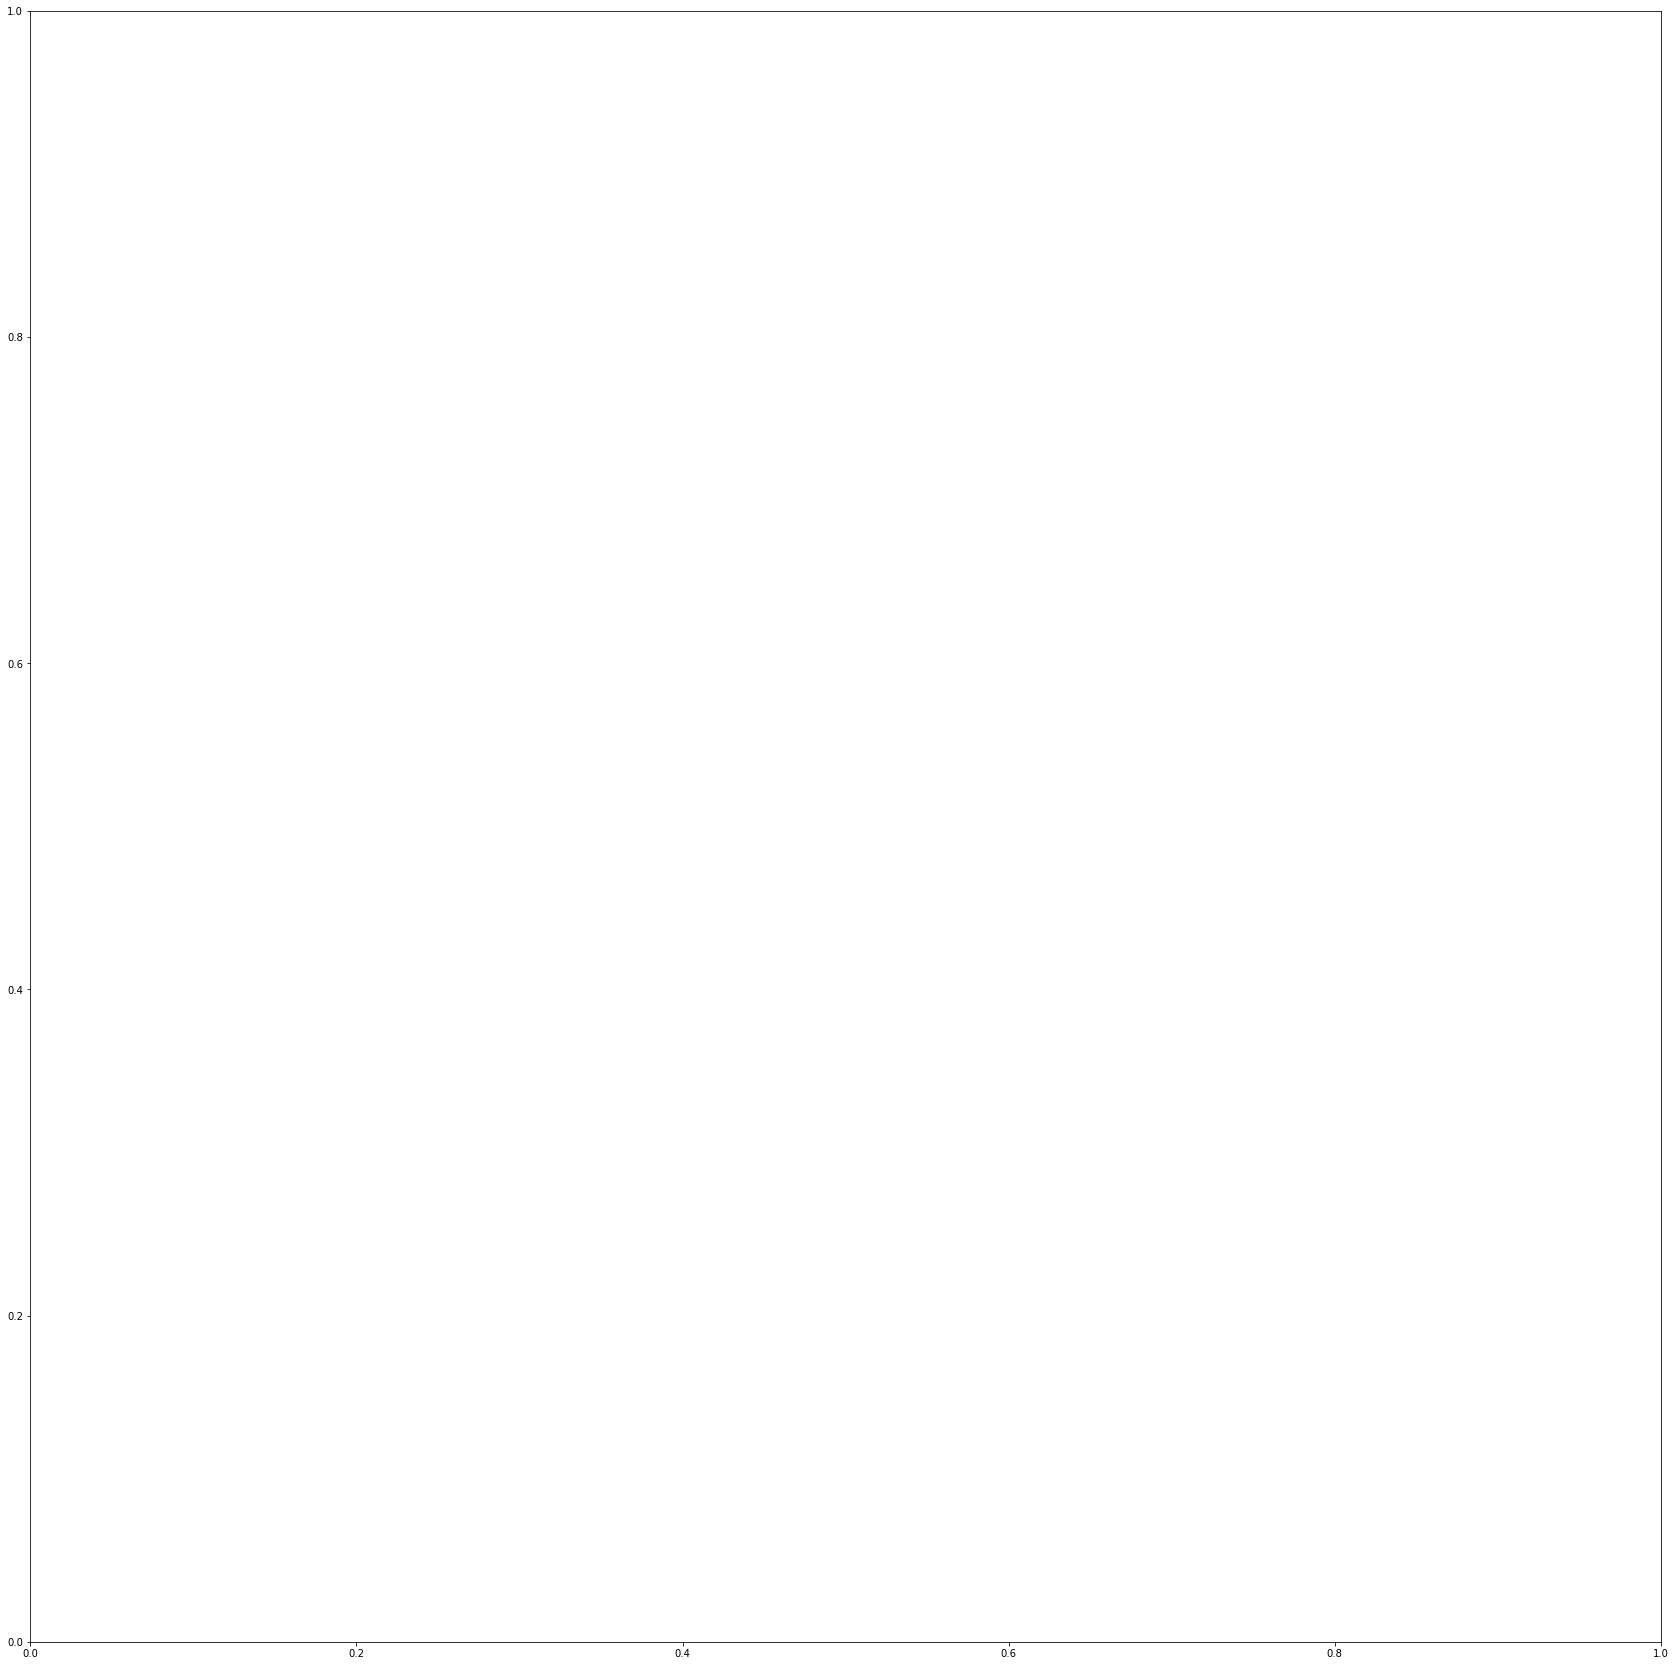

In [173]:
plt.figure(figsize=(40, 30))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

In [162]:
news.title_tokens

0       [F, e, r,  , f, r,  , T,  , N,  , p, e, n, n, ...
1       [T, h, e,  , R, c, e,  ,  , O, n, :,  , S, e, ...
2       [K, .,  , C, p, n,  , W, n,  , G, r, n,  ,  , ...
3       [P, r, e, c, n,  , U, n,  , H, e, l, p,  , F, ...
4       [C, l, f, .,  , A,  ,  , L,  , F, r, -, R, e, ...
                              ...                        
7595                    [A, r, u, n,  , h, e,  , w, r, l]
7596     [V,  ,  , f, l, l, e,  , w, h,  , C, l, e, e, n]
7597           [M, r, n, e, z,  , l, e, v, e,  , b, e, r]
7598    [5,  , f,  , r, h, r,  , p, e, n,  , n,  , S, ...
7599                 [E, B,  , g, e,  , n,  , r, e, n, l]
Name: title_tokens, Length: 7600, dtype: object

noun extract

In [ ]:
#to do

In [186]:
pos_tag(news.title_tokens[0])

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\user/nltk_data'
    - 'c:\\Users\\user\\anaconda3\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\user\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\user\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [239]:
contractions = pd.DataFrame(
    np.array([word for word in contractions['word\tcontraction'].str.split('\t').explode().values if word != '']).reshape(-1, 2),
    columns = ['words', 'contraction']
)
contractions.contraction = contractions.contraction.str.replace('`', '\'')

KeyError: 'word\tcontraction'

In [234]:
contractions.head()

,words,contraction
0,are not,aren’t
1,cannot,can’t
2,could not,couldn’t
3,did not,didn’t
4,do not,don’t


In [236]:
news.Title[0] in contractions.contraction

False

In [238]:
def explode_contractions(string, contractions):
    for index, contraction in enumerate(contractions.contraction):
        if contraction in string:
            string = string.replace(contraction, contraction.words[index])
    return string

In [242]:
news.Title.apply(lambda x: explode_contractions(x, constractions))

0                       Fears for T N pension after talks
1       The Race is On: Second Private Team Sets Launc...
2           Ky. Company Wins Grant to Study Peptides (AP)
3           Prediction Unit Helps Forecast Wildfires (AP)
4             Calif. Aims to Limit Farm-Related Smog (AP)
                              ...                        
7595                                     Around the world
7596                          Void is filled with Clement
7597                               Martinez leaves bitter
7598    5 of arthritis patients in Singapore take Bext...
7599                               EBay gets into rentals
Name: Title, Length: 7600, dtype: object

In [ ]:
for row in news.itertuples():
    print(row.Index)
    

In [226]:
contractions

,word\tcontraction
0,are not\taren’t
1,cannot\tcan’t
2,could not\t\tcouldn’t
3,did not\tdidn’t
4,do not\tdon’t
5,does not\tdoesn’t
6,had not\thadn’t
7,have not\thaven’t
8,he is\the’s
9,he has\the’s


In [244]:
from nltk.corpus import stopwords
import nltk

In [247]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [254]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [255]:
news.Title

0                       Fears for T N pension after talks
1       The Race is On: Second Private Team Sets Launc...
2           Ky. Company Wins Grant to Study Peptides (AP)
3           Prediction Unit Helps Forecast Wildfires (AP)
4             Calif. Aims to Limit Farm-Related Smog (AP)
                              ...                        
7595                                     Around the world
7596                          Void is filled with Clement
7597                               Martinez leaves bitter
7598    5 of arthritis patients in Singapore take Bext...
7599                               EBay gets into rentals
Name: Title, Length: 7600, dtype: object

In [256]:
def remove_stopwords(string, stopwords_list):
    for stopword in stopwords_list:
        string = string.replace(stopword, '')
    
    return string

In [257]:
news['title_removed_stopword']= news.Title.apply(lambda x: remove_stopwords(x, stopwords_list))

In [258]:
news

,Class Index,Title,Description,title_removed_stopword
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Fer f T N pen fer lk
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",T Rce On: Sec Pr Te Se Lunch De f Hun Spceflg...
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,K. Cpn Wn Grn Su Pepe (AP)
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Pcn Un Help Fec Wlf (AP)
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Clf. A L Fr-Rele Sg (AP)
...,...,...,...,...
7595,1,Around the world,Ukrainian presidential candidate Viktor Yushch...,Arun wl
7596,2,Void is filled with Clement,With the supply of attractive pitching options...,V fe wh Clen
7597,2,Martinez leaves bitter,Like Roger Clemens did almost exactly eight ye...,Mrnez le ber
7598,3,5 of arthritis patients in Singapore take Bext...,SINGAPORE : Doctors in the United States have ...,5 rhr pen n Sngpe ke Bexr Celebx &l;b&g;...&...


## 5.4 한국어 자료 전처리